# はじめに
[こちらのページ](https://w.atwiki.jp/hinatazaka46liveinfo/sp/pages/31.html)で公開された4回目のひな誕祭FC先行（1日目）抽選結果アンケートを分析しました。

- アンケート作成者：https://twitter.com/6CtFt3qHDLUrQ9w/status/1619262105525587969
- 先行研究者：https://twitter.com/hinatashimizu?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor

In [25]:
#グラフをアクティブに
%matplotlib notebook

#必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import scipy
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#グラフの見た目設定
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = '14'

#データの読み込み
df = pd.read_csv("fc.csv")
df["fc"] = df["fc"] * 365.0   #FC歴の単位を年から日に変換
df #データの確認

,tichet,single,card,male,age,fc,gomi,goshuin
0,0,0,1,1,1,500.0,1,0
1,0,1,1,1,0,400.0,0,0
2,0,1,0,1,0,750.0,0,0
3,0,0,0,1,1,1.0,0,0
4,0,0,0,1,1,365.0,0,0
...,...,...,...,...,...,...,...,...
1753,1,0,0,1,0,200.0,0,0
1754,1,1,0,1,1,900.0,0,0
1755,1,1,0,1,0,800.0,0,0
1756,1,1,0,1,0,1451.0,0,0


このDataFrameの変数の説明は以下の通りです。

|  変数名  |  説明  |
| --- | --- |
|tichet | 当選が1落選が0（申し込みせずは利用せず）|
|single | 単独申込が1、連番申込が0|
|card | クレジットカード利用が1、コンビニ払いが0|
|male | 男性が1、女性が0|
|age | 25歳未満が1、25歳以上が0|
|fc | FC加入日数|
|gomi | ゴミ集めにはいが1、いいえが0|
|goshuin | 御朱印あつめにはいが1、いいえが0|

# データの俯瞰
まずはデータを俯瞰してみます。

## 各統計量
基本的な統計量は`pandas.DataFrame.describe`で出せます。

count -> 有効なデータ数

mean  -> 平均値（例えばtichetのmean=0.356は、回答者の35.6%が当選したという意味）

std   -> 標準偏差

min   -> 最小値

25%   -> 下から数えて25%のデータが含まれる点

50%   -> 下から数えて50%のデータが含まれる点 = 中央値

75%   -> 下から数えて75%のデータが含まれる点

max   -> 最大値

In [26]:
df.describe()

,tichet,single,card,male,age,fc,gomi,goshuin
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,0.355518,0.493743,0.602958,0.852105,0.459613,659.059158,0.142207,0.134812
std,0.478806,0.500103,0.489424,0.355097,0.498508,463.799329,0.349362,0.341620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,300.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,560.500000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1052.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1800.000000,1.000000,1.000000


## おひさまFC歴および男女比
おひさまのFC歴と男女比の関係をプロットしました。このビンの区切りだと多少ガタガタですが、FC歴と男女比に大きい偏りは見られませんでした。

また、加入30日以内の度数が多かったので、1日ごとのヒストグラムも作成したところ、0日に大きいピークが見られました。この方々はFC先行申し込みに参加するために加入されたのだと思いますが、**アンケート回答者の10%がひな誕祭のためにFC加入した**とすると影響の大きさが窺えます。

アンケート時点でFC歴は最長で1440日程度なので、1500日とかになっているデータはあり得ないですがそのまま使います。

<IPython.core.display.Javascript object>


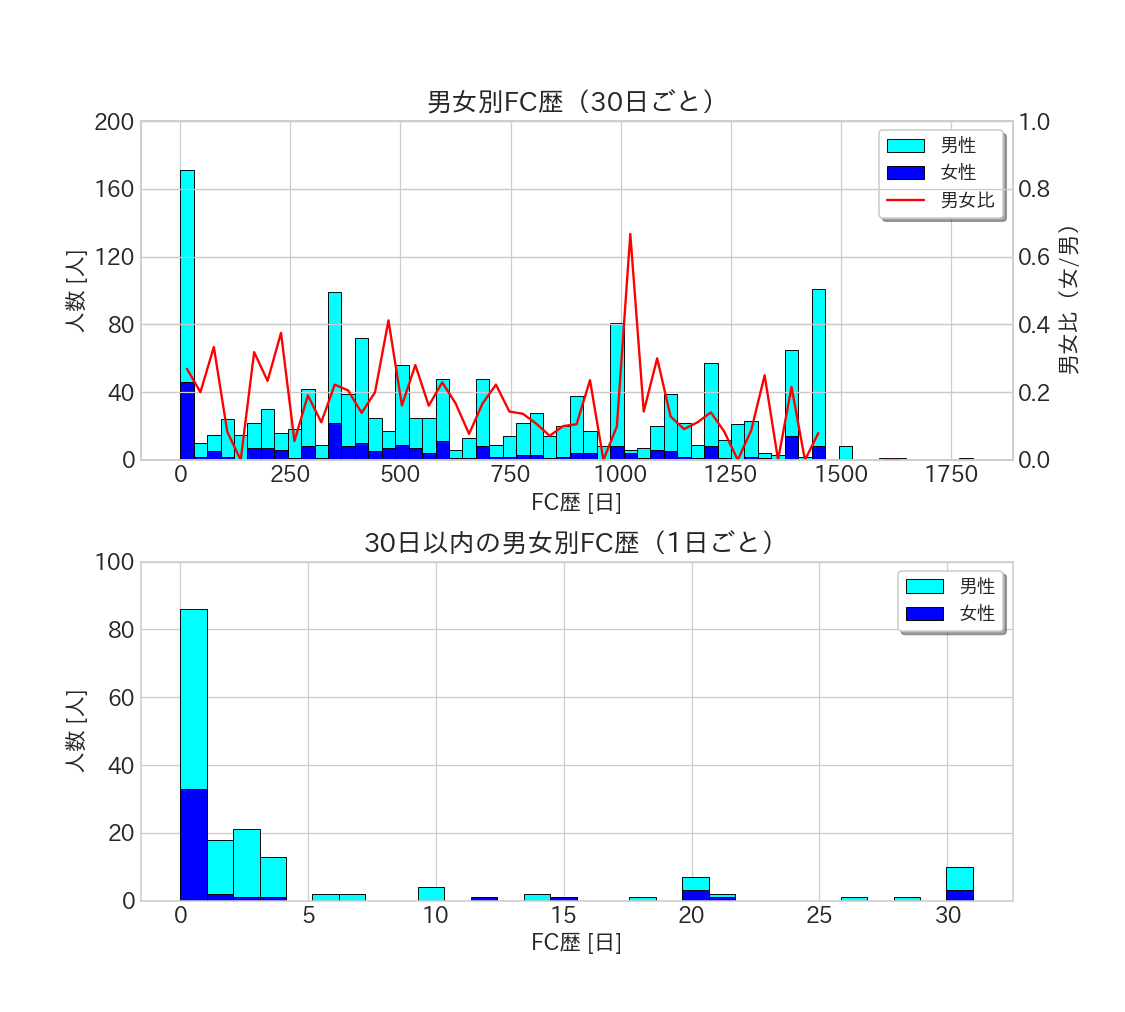

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [27]:
#キャンバスの作成
fig, ax = plt.subplots(2,1,figsize=[10,9]) #キャンバスの作成
plt.subplots_adjust(wspace=0., hspace=0.3) #図の間隔の調整
ax02     = ax[0].twinx()                   #2軸の追加

#グラフの描画
bins = np.linspace(0,1800,60)              #ヒストグラムのビンの設定。0から1800日までを30日ごとに区切る
ax[0].hist(df[df["male"]==1]["fc"], bins=bins, color="cyan",label="男性",ec='black',linewidth=0.6) #ヒストグラムの描画
ax[0].hist(df[df["male"]==0]["fc"], bins=bins, color="blue",label="女性",ec='black',linewidth=0.6)
h1, l1 = ax[0].get_legend_handles_labels() #handleの取得

hist_male, _   = np.histogram(df[df["male"]==1]["fc"], bins=bins)  # 男性の各ヒストグラムの度数を取得（男女比の計算用）
hist_female, _ = np.histogram(df[df["male"]==0]["fc"], bins=bins)  # 女性
ax02.plot((bins[:-1]+bins[1:])/2.,hist_female/hist_male, color = "red",label="男女比")  #男女比のプロット
h2, l2 = ax02.get_legend_handles_labels() #handleの取得

#グラフの調整
ax[0].set_title("男女別FC歴（30日ごと）")       #グラフのタイトル
ax[0].set_xlabel("FC歴 [日]")                 #x軸の名前
ax[0].set_ylabel("人数 [人]")
ax[0].yaxis.set_major_locator(MaxNLocator(6)) #y軸の目盛の数を設定
ax[0].set_ylim(0,200)                         #y軸の範囲を設定
ax[0].legend(h1+h2,l1+l2,loc='upper right',frameon=True,shadow=True,fontsize=12)  #凡例の追加

ax02.yaxis.set_major_locator(MaxNLocator(6)) 
ax02.set_ylim(0.0,1.)
ax02.set_ylabel("男女比（女/男）")

#FC加入30日以内の人のヒストグラム
bins = np.linspace(0,31,31)

ax[1].set_title("30日以内の男女別FC歴（1日ごと）")
ax[1].hist(df[df["male"]==1]["fc"], bins=bins, color="cyan",label="男性",ec='black',linewidth=0.6)
ax[1].hist(df[df["male"]==0]["fc"], bins=bins, color="blue",label="女性",ec='black',linewidth=0.6)

ax[1].set_xlabel("FC歴 [日]")
ax[1].set_ylabel("人数 [人]")
ax[1].set_ylim(0,100)
ax[1].legend(loc='upper right',frameon=True,shadow=True,fontsize=12)

# 項目ごとの当選率

データの各項目が当選率にどのように影響しているかを分析します。ほとんど[Ref.1](https://w.atwiki.jp/hinatazaka46liveinfo/sp/pages/31.html)で分析されていますが、こちらでもやってみます。

## 当選率 vs FC歴

FC歴ごとの当選率をプロットしました。FC歴が長くなるとビンあたりの統計が少ないので、テキトーに長くしています。
大体FF歴450日あたりで変化が見られました。450日以内の人は20%程度、450日超えは50%くらいに見えます。

<IPython.core.display.Javascript object>


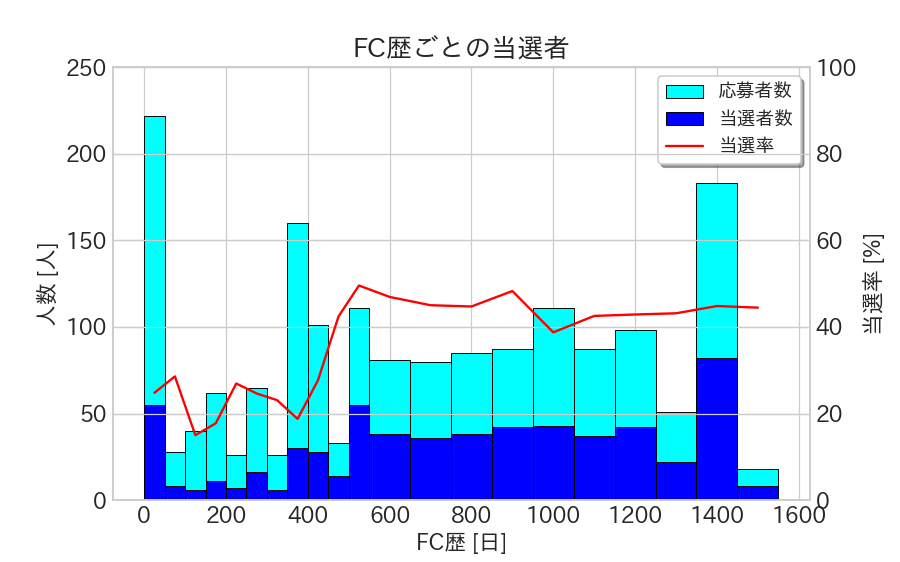

Text(0, 0.5, '当選率 [%]')

In [28]:
bins = np.append(np.linspace(0,550,12), np.linspace(650,1550,10)) #ビンの設定。0から550日は50日ごと、550から1550日は100日ごとに区切る
hist_all, _    = np.histogram(df["fc"], bins=bins)
hist_tichet, _ = np.histogram(df[df["tichet"]==1]["fc"], bins=bins)

fig, ax1 = plt.subplots(figsize=[8,5])
ax2 = ax1.twinx()

ax1.set_title("FC歴ごとの当選者")
ax1.hist(df["fc"], bins=bins, color="cyan", label="応募者数",ec='black',linewidth=0.6)
ax1.hist(df[df["tichet"]==1]["fc"], bins=bins, color="blue",label="当選者数",ec='black',linewidth=0.6)
h1, l1 = ax1.get_legend_handles_labels()
ax2.plot((bins[:-1]+bins[1:])/2., 100.*hist_tichet/hist_all, color = "red",label="当選率")  #当選率のプロット
h2, l2 = ax2.get_legend_handles_labels()

ax1.set_ylim(0,250)
ax1.set_xlabel("FC歴 [日]")
ax1.set_ylabel("人数 [人]")
ax1.legend(h1+h2,l1+l2,loc='upper right',frameon=True,shadow=True,fontsize=12)
ax2.set_ylim(0.0,100.)
ax2.set_ylabel("当選率 [%]")

FC歴以外は質的データ（YesかNoか）なので、クロス集計による分析をします。これも[Ref.1](https://w.atwiki.jp/hinatazaka46liveinfo/sp/pages/31.html)で結構分析されていますが。

In [29]:
#カイ二乗検定をする関数
def chi2_test(df, factor1, factor2):
    df_cross = pd.crosstab(df[factor1],df[factor2])   #クロス集計表の作成、カイ二乗検定で使う
    df_      = pd.crosstab(df[factor1],df[factor2],margins=True) #合計値ありのクロス集計表、データ確認用
    print("実データ")
    print(df_)

    print()
    print()

    print("期待値")
    chi2, p, dof, expected = scipy.stats.chi2_contingency(df_cross,correction=False) #カイ二乗検定し、カイ二乗値、p値、自由度、期待値を取得
    expected = pd.DataFrame(expected)  #2次元のndarrayをDataFrameに変換
    expected = pd.concat([expected,pd.DataFrame(expected.sum(axis=0),columns=['All']).T])      #列ごとの合計値を追加
    expected = pd.concat([expected,pd.DataFrame(expected.sum(axis=1),columns=['All'])],axis=1) #行ごとの合計値を追加
    print(expected)
    
    print()
    print()
    print("カイ二乗値は %(chi2)s" %locals() )
    print("p値は %(p)s" %locals() )
    print("自由度は %(dof)s" %locals() )

    if p < 0.05:   #有意水準5%
        print("有意な差があります")
    else:
        print("有意な差がありません")
    
    return


#棒グラフの作成
def plot_bar(df, factor1, factor2, title, tick_label):
    df_cross = pd.crosstab(df[factor1],df[factor2])
    left = np.array([0, 1])
    rakusen = df_cross[:][0]
    tosen   = df_cross[:][1]
    plt.bar(left, rakusen,width=0.5,tick_label=tick_label,align="center",label="落選者数（割合）",color="blue")
    plt.bar(left, tosen, bottom=rakusen,width=0.5,label="当選者数（割合）",color="cyan")

    for i in range(len(left)):
        plt.text(left[i], rakusen[i]/2, str(rakusen[i])+" ("+"{:.2f}".format(100.*rakusen[i]/(df_cross.sum(axis=1)[i]))+"%)", \
                 ha='center', va='bottom',color="white")
        plt.text(left[i], rakusen[i]+tosen[i]/2, str(tosen[i])+" ("+"{:.2f}".format(100.*tosen[i]/(df_cross.sum(axis=1)[i]))+"%)", \
                 ha='center', va='bottom')

    plt.grid(axis="x")
    ax.legend(loc='best',frameon=True,shadow=True,fontsize=12)
    ax.set_ylabel("当選者数 [人]")
    ax.set_title(title)
    print()
    print()

## 当選率 vs 支払い方法

[Ref.2](https://twitter.com/hinatashimizu/status/1616117958434263045?t=C_l4xvyjRLSBzzG_Uz-B2g&s=19)で示されたように、クレジットカード払いの方が当選率が高いみたいです。

但し、FC1次の話であって、2次は関係なかったらしいです[Ref.3](https://twitter.com/hinatashimizu/status/1619313643618979840?t=CNkbcy5jxzH09Uwp_Grydg&s=19)。

<IPython.core.display.Javascript object>


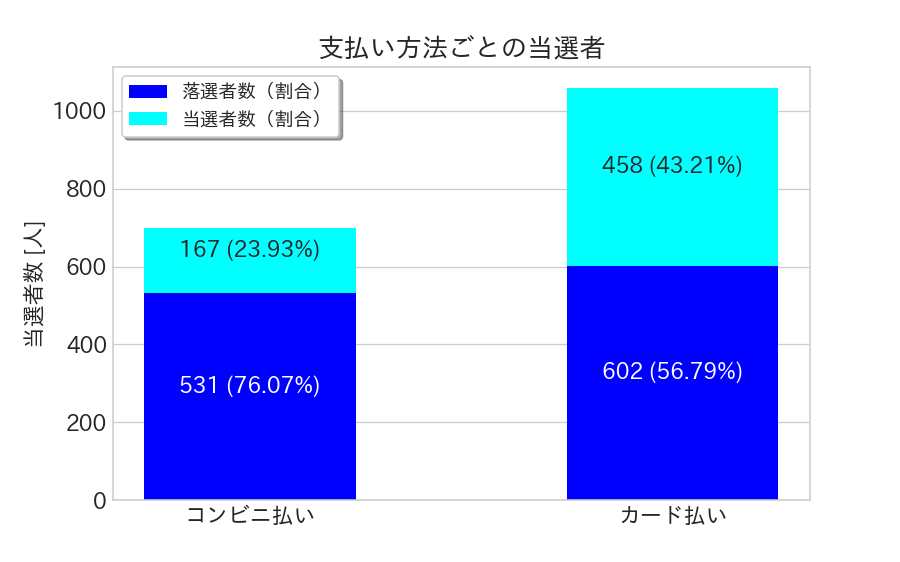

実データ
tichet     0    1   All
card                   
0        531  167   698
1        602  458  1060
All     1133  625  1758


期待値
               0           1     All
0     449.848692  248.151308   698.0
1     683.151308  376.848692  1060.0
All  1133.000000  625.000000  1758.0


カイ二乗値は 68.29304053679563
p値は 1.409174459821961e-16
自由度は 1
有意な差があります




In [30]:
fig, ax = plt.subplots(figsize=[8,5])

chi2_test(df, "card", "tichet")
plot_bar(df, "card", "tichet",title="支払い方法ごとの当選者",tick_label=["コンビニ払い","カード払い"])

## 当選率 vs 単独

単独の方が当たりやすいようです。意外。

<IPython.core.display.Javascript object>


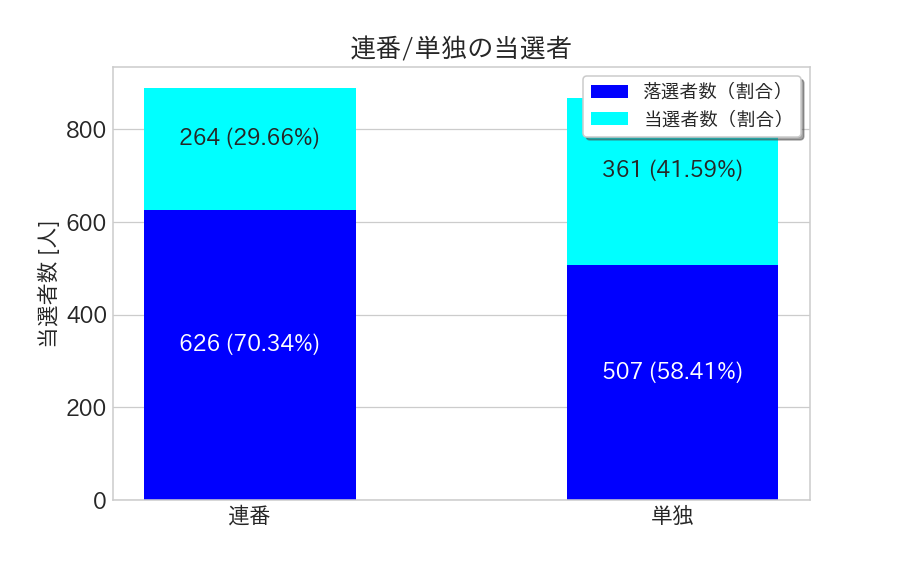

実データ
tichet     0    1   All
single                 
0        626  264   890
1        507  361   868
All     1133  625  1758


期待値
               0           1     All
0     573.589306  316.410694   890.0
1     559.410694  308.589306   868.0
All  1133.000000  625.000000  1758.0


カイ二乗値は 27.282035748530404
p値は 1.758374900177619e-07
自由度は 1
有意な差があります




In [31]:
fig, ax = plt.subplots(figsize=[8,5])

chi2_test(df, "single", "tichet")
plot_bar(df, "single", "tichet",title="連番/単独の当選者",tick_label=["連番","単独"])

## 当選率 vs 性別

このデータで男女の当選率の差をカイ二乗検定したところ**有意差がある**という結果になりました。

但し、[Ref.4](https://twitter.com/hinatashimizu/status/1617729297535623169?t=gbAo_D_Zq9y8wtQBFrETfw&s=19)では男女差がないことが示されています。

<IPython.core.display.Javascript object>


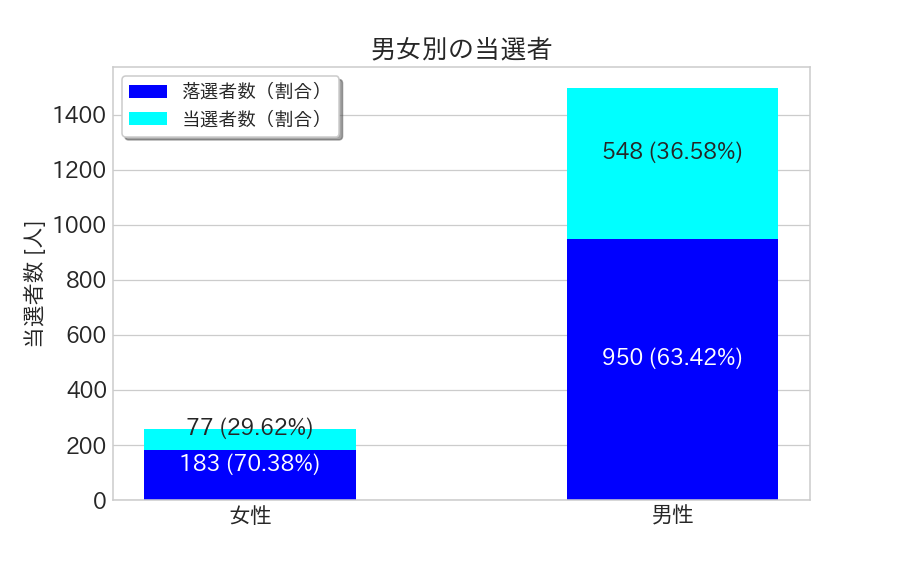

実データ
tichet     0    1   All
male                   
0        183   77   260
1        950  548  1498
All     1133  625  1758


期待値
               0           1     All
0     167.565415   92.434585   260.0
1     965.434585  532.565415  1498.0
All  1133.000000  625.000000  1758.0


カイ二乗値は 4.693009393829109
p値は 0.030285560688162256
自由度は 1
有意な差があります




In [32]:
fig, ax = plt.subplots(figsize=[8,5])

chi2_test(df, "male", "tichet")
plot_bar(df, "male", "tichet",title="男女別の当選者",tick_label=["女性","男性"])

### 信頼区間の検討

そこで、男性、女性の当選率の95%信頼区間を計算してみました。

今回のデータでも女性と男性で信頼区間が重なっているので、男女差があるとは明言できないかと思います（カイ二乗分布と二項分布の信頼区間だと結果が違うんですね）。

In [33]:
alpha    = 0.95                      # 信頼区間
n        = (df["male"]==0).sum()    # 試行回数
ntosen   = ((df["male"]==0)&(df["tichet"]==1)).sum()
nrakusen = ((df["male"]==0)&(df["tichet"]==0)).sum()
p     = ntosen / n                   # 標本比率(成功回数を試行回数で割ったもの)
bottom, up = scipy.stats.binom.interval(alpha=alpha, n=n, p=p, loc=0)
print('女性の当選率の95%信頼区間: [ {:.4f} , {:.4f} ]'.format(bottom/n, up/n))

n        = (df["male"]==1).sum()    # 試行回数
ntosen   = ((df["male"]==1)&(df["tichet"]==1)).sum()
nrakusen = ((df["male"]==1)&(df["tichet"]==0)).sum()
p     = ntosen / n                   # 標本比率(成功回数を試行回数で割ったもの)
bottom, up = scipy.stats.binom.interval(alpha=alpha, n=n, p=p, loc=0)
print('男性の当選率の95%信頼区間: [ {:.4f} , {:.4f} ]'.format(bottom/n, up/n))

女性の当選率の95%信頼区間: [ 0.2423 , 0.3538 ]
男性の当選率の95%信頼区間: [ 0.3418 , 0.3905 ]


## 当選率 vs 神頼み

ゴミ拾い、御朱印集めの効果はありませんでした。御朱印よりクレジットカード持った方が当選率は上げられるかもしれません。

<IPython.core.display.Javascript object>


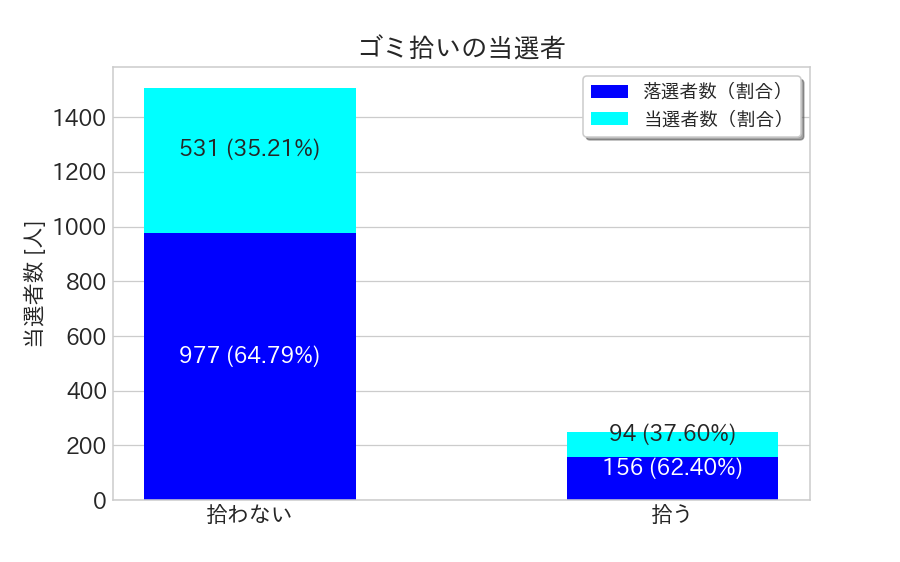

---------ゴミ拾い---------
実データ
tichet     0    1   All
gomi                   
0        977  531  1508
1        156   94   250
All     1133  625  1758


期待値
               0           1     All
0     971.879408  536.120592  1508.0
1     161.120592   88.879408   250.0
All  1133.000000  625.000000  1758.0


カイ二乗値は 0.5336366025532552
p値は 0.4650819561687246
自由度は 1
有意な差がありません




<IPython.core.display.Javascript object>


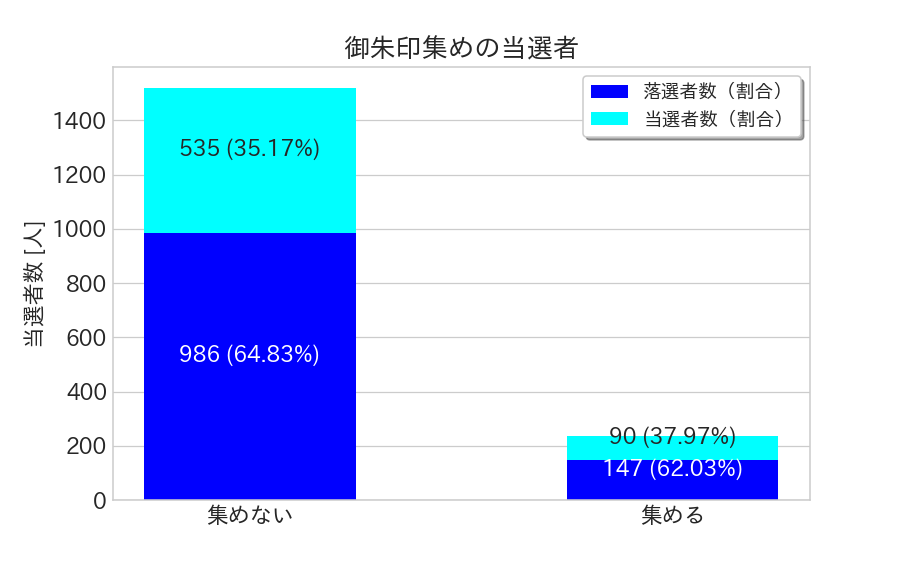

---------御朱印集め---------
実データ
tichet      0    1   All
goshuin                 
0         986  535  1521
1         147   90   237
All      1133  625  1758


期待値
               0           1     All
0     980.257679  540.742321  1521.0
1     152.742321   84.257679   237.0
All  1133.000000  625.000000  1758.0


カイ二乗値は 0.7018495568393937
p値は 0.4021629133925043
自由度は 1
有意な差がありません




In [34]:
fig, ax = plt.subplots(figsize=[8,5])
print("---------ゴミ拾い---------")
chi2_test(df, "gomi", "tichet")
plot_bar(df, "gomi", "tichet",title="ゴミ拾いの当選者",tick_label=["拾わない","拾う"])



fig, ax = plt.subplots(figsize=[8,5])
print("---------御朱印集め---------")
chi2_test(df, "goshuin", "tichet")
plot_bar(df, "goshuin", "tichet",title="御朱印集めの当選者",tick_label=["集めない","集める"])

## ロジスティック回帰分析

内容はよく理解していませんが、[Ref.1](https://w.atwiki.jp/hinatazaka46liveinfo/sp/pages/31.html)がやっていたのをPythonでやったらこうなるよってことで載せました。

[Ref.5](https://corvus-window.com/python_logistic-regression-analysis/)を見ると、P>|z|が小さいほど有意差があるということみたいです。
上で見たように単番/連番、カード払い/コンビニ払い、FC歴が大きく効くみたいです。ageも効くのかな（FC歴やカード払いが多いだけかも）。

In [35]:
logistic = smf.glm(formula = "tichet ~ single + card + male + age + fc + gomi + goshuin",
                   data = df,
                   family = sm.families.Binomial()).fit()

print(logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 tichet   No. Observations:                 1758
Model:                            GLM   Df Residuals:                     1750
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1079.9
Date:                Thu, 16 Feb 2023   Deviance:                       2159.8
Time:                        20:07:28   Pearson chi2:                 1.76e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6993      0.203     -8.376      0.0

## 当選率 vs 複数項目

今まで見たように、当選確率に関係しそうなのは単番/連番、カード払い/コンビニ払い、FC歴の3項目でした。この3項目の組み合わせで当選率が変わるのか検証したところ面白い結果が得られました。

まずFC歴は450日で境目がありそうなので、FC歴450日以内か超えているかで分類し、クロス集計表を作ってみました。

表を見やすくした棒グラフも描画しています。エラーバーは95%信頼区間を示しています。

FC歴が短くても単番かつカード払いであれば当選率をかなり上げることができそうです。

tichet               0    1   All
long single card                 
0    0      0      164   23   187
            1      175   53   228
     1      0      150   18   168
            1       74   73   147
1    0      0       98   70   168
            1      189  118   307
     1      0      119   56   175
            1      164  214   378
All               1133  625  1758



<IPython.core.display.Javascript object>


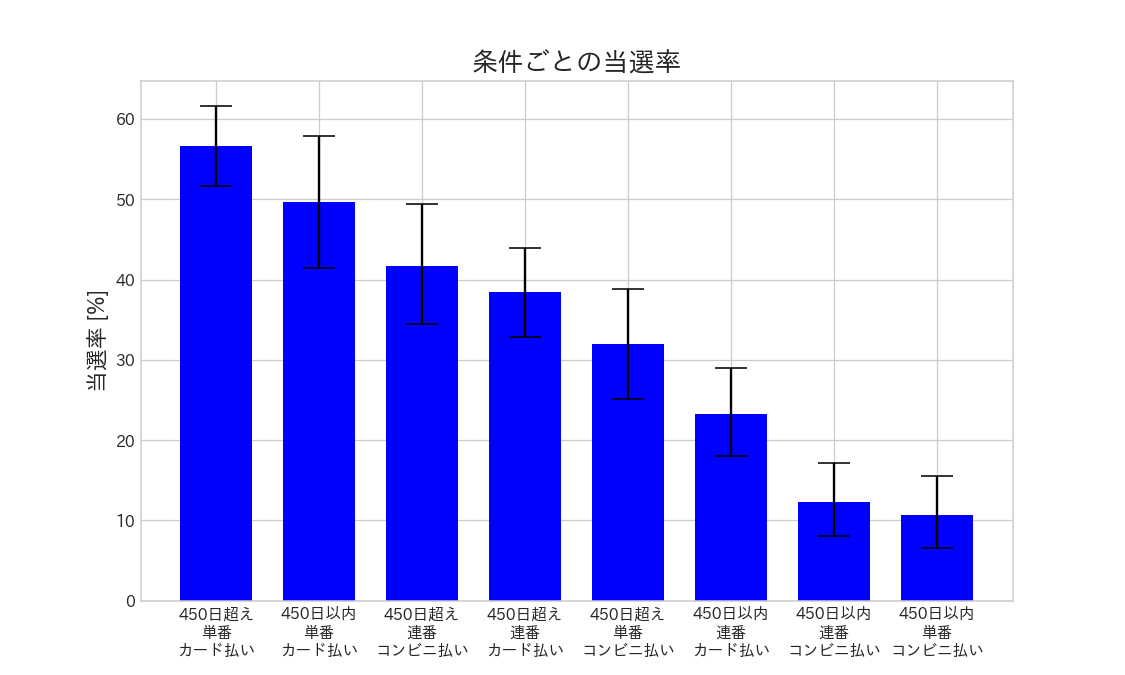

In [36]:
#クロス集計表の作成
df["long"] = (df["fc"] > 450.1) * 1 #FC1歴が450日以内であれば0, 超えていれば1
df_cross = pd.crosstab([df['long'], df['single'], df['card']] , df['tichet'], margins=True)

print(df_cross)
print()

#信頼区間の計算
alpha    = 0.95                      # 信頼区間
n     = df_cross.loc[:,"All"].to_numpy()[:-1]  #カテゴリごとの統計。クロス集計表の一番右の列を取り出したndarray
tosen = df_cross.loc[:,1].to_numpy()[:-1]      #カテゴリごとの当選率。クロス集計表の右から二番目の列を取り出したndarray
p     = tosen / n                   # 標本比率(成功回数を試行回数で割ったもの)

up     = np.zeros(len(n))           # 信頼区間の上限を格納するndarray
bottom = np.zeros(len(n))           # 信頼区間の下限を格納するndarray

for i in range(len(n)):
    bottom[i], up[i] = scipy.stats.binom.interval(alpha=alpha, n=n[i], p=p[i], loc=0)

p      = p * 100.                   # 百分率に換算
bottom = bottom / n * 100.
up     = up / n * 100.

#棒グラフの作成
tick_label=np.array(["450日以内\n連番\nコンビニ払い",  #FC歴、連番/単番、支払い方法
                     "450日以内\n連番\nカード払い",
                     "450日以内\n単番\nコンビニ払い",
                     "450日以内\n単番\nカード払い",
                     "450日超え\n連番\nコンビニ払い",
                     "450日超え\n連番\nカード払い",
                     "450日超え\n単番\nコンビニ払い",
                     "450日超え\n単番\nカード払い"])

tick_label = tick_label[np.argsort(-p)]              #当選率の高い順にソート
bottom = bottom[np.argsort(-p)]
up     = up[np.argsort(-p)]
p      = np.sort(p)[::-1]

#グラフ描画
fig, ax = plt.subplots(figsize=[10,6])
ax.set_title("条件ごとの当選率")
ax.set_ylabel("当選率 [%]")
ax.bar(np.linspace(0,len(n),len(n)), p, yerr=[p-bottom,up-p], tick_label=tick_label, color="blue", ecolor='black',capsize=10)
plt.tick_params(labelsize=10)

# まとめ
4回目のひな誕祭アンケート（FC先行1次、1日目）のデータを分析してみました。結果、以下のことが言えそうです。

- ひな誕祭の申し込み者の10%程度は先行抽選のためにFCに加入した。
- FC歴450日くらいを境目に当選率が変化。
- 単番申し込み、カード払いの方が当選率が高い。
- 上の二つの条件を細かく見ると、条件の組み合わせによって当選率が大きく変化している。